# Image Classifier for Detecting Playing Cards

Three phases:

1. PyTorch Dataset (and Dataloader)

2. PyTorch Model

3. PyTorch Training Loop

In [ ]:
import torch
import torch.nn as nn # Neural networks functions
import torch.optim as optim # Optimizer
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms # For working with image files
from torchvision.datasets import ImageFolder # For working with image files
import timm # Has built-in image classification architectures that are ready to use

import matplotlib.pyplot as plt # For data visualization
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm # For training loop progress bar

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

/Users/fosse/Desktop/python/pytorch/pytorch-venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


System Version: 3.13.7 (main, Aug 14 2025, 11:12:11) [Clang 17.0.0 (clang-1700.0.13.3)]
PyTorch version 2.8.0
Torchvision version 0.23.0
Numpy version 2.3.3
Pandas version 2.3.3


## 1. PyTorch Dataset (and Dataloader)

Setup the dataset and wrap it in a dataloader.

In [ ]:
class PlayingCardDataset(Dataset): # Dataset is imported from torch.utils.data
    # What to do when created
    def __init__(self, data_dir, transform = None):
        # ImageFolder is imported from torchvision.datasets
        self.data = ImageFolder(data_dir, transform = transform)
    
    # Tells Dataloader how many examples there are in a dataset
    def __len__(self):
        return len(self.data)

    # Takes an index location in a dataset, returns one item
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    # Returns class names
    def classes(self):
        return self.data.classes

### Create test dataset

In [3]:
# Create an instance of the class just created
dataset = PlayingCardDataset(
    # data_dir = "/kaggle/input/cards-image-datasetclassification/train/"
    data_dir = "./assets/cards-image-datasetclassification/train/"
)

In [ ]:
# Test the length function
len(dataset)

7624

41


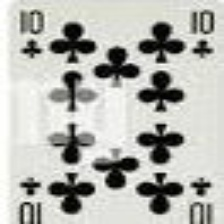

In [ ]:
# Test the dataset
image, label = dataset[6000]

print(label)

image

In [7]:
# data_dir = "/kaggle/input/cards-image-datasetclassification/train"
data_dir = "./assets/cards-image-datasetclassification/train/"

# Get a dictionary associating target values with folder names
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}

print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [8]:
# Make sure that the dataset outputs all images in the same size

transform = transforms.Compose([ # transforms is imported from torchvision.transforms
    transforms.Resize((128, 128)),
    # Convert to PyTorch Tensor
    transforms.ToTensor(),
])

# data_dir = "/kaggle/input/cards-image-datasetclassification/train"
data_dir = "./assets/cards-image-datasetclassification/train/"
dataset = PlayingCardDataset(data_dir, transform)

In [ ]:
image, label = dataset[100]

# The image is now a tensor
image

tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
         [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
         ...,
         [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
         [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
         [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
         ...,
         [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
         [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
         [0.0118, 0.0196, 0.3137,  ..., 0.2196, 0.0235, 0.

In [ ]:
# The image has 3 channels (r, g, b) and its size is 128 * 128
image.shape

torch.Size([3, 128, 128])

In [ ]:
# Iterate over dataset
# for image, label in dataset:
    # break

### Dataloaders

Batch the dataset (faster to train the model in batches instead of one at a time).

A Dataloader handles the processing to parallellize reading in each image.

In [14]:
# Create a DataLoader (imported from torch.utils.data)
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True) # Use shuffling when training (not when testing or validating)

In [ ]:
# for images, labels in dataloader:
    # break

In [ ]:
# The dataset has now been batched into 32 examples
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [18]:
labels

tensor([ 9, 35, 49, 29, 21, 52,  4, 19, 42,  6, 36, 41, 18, 24,  3, 47, 25, 44,
        42, 21, 11, 41, 30, 50, 14, 16, 35,  5, 31, 49, 41, 30])

## 2. PyTorch Model

We're going to use a predefined architecture that's provided by timm.

In [ ]:
class SimpleCardClassifier(nn.Module): # Module is imported from torch.nn
    # In init all the parts of the model are defined
    def __init__(self, num_classes = 53):
        # Initializes this object with everything from the parent class
        super(SimpleCardClassifier, self).__init__()

        # Create an efficientnet_b0 architecture model with timm
        self.base_model = timm.create_model("efficientnet_b0", pretrained = True) # pretrained means that the model weights have already been trained on the imagenet dataset
        # Removes the model's last layer
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        # Feature size
        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    # Takes an example (or a batch of them)
    # and connects the parts defined in init,
    # then returns the output
    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [20]:
# Create the model
model = SimpleCardClassifier(num_classes=53)
print(str(model)[:500])

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [22]:
# Test the model
example_out = model(images)

example_out

tensor([[ 0.1852, -0.2647,  0.1345,  ..., -0.4806,  0.0197, -0.2483],
        [-0.0358,  0.3019,  0.0618,  ...,  0.1961,  0.3393, -0.2038],
        [-0.1683, -0.1955,  0.0511,  ...,  0.0700,  0.2989, -0.1934],
        ...,
        [ 0.2329,  0.0577,  0.3101,  ..., -0.1355,  0.1157, -0.3375],
        [-0.0067, -0.9062, -0.1896,  ...,  0.0632,  0.0128,  0.4166],
        [-0.2483,  0.0735, -0.3051,  ...,  0.3740, -0.0881,  0.0923]],
       grad_fn=<AddmmBackward0>)

In [23]:
example_out.shape # [batch_size, num_classes]

torch.Size([32, 53])

## 3. The training loop

"Feed the data into the model many times, apply some sort of loss function to the outputs we receive. This is how the model learns."

Create the process of training this model (written from scratch).

Terms:
- Epoch: One run through the entire training dataset
- Step: One batch of data as defined in our dataloader

You load in data to the model in batches - then calculate the loss and perform backpropagation.

Two things to select:
  - optimizer, `adam` is the best place to start for most tasks
  - loss function: What the model will optimize for

In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss() # nn is imported from torch.nn
# Optimizer
# optim is imported from torch.optim
optimizer = optim.Adam(model.parameters(), lr = 0.001) # lr stands for learning rate

In [ ]:
# Test the loss function
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


### Setup datasets

In [ ]:
# Resize images
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# train_folder = "../input/cards-image-datasetclassification/train/"
# valid_folder = "../input/cards-image-datasetclassification/valid/"
# test_folder = "../input/cards-image-datasetclassification/test/"
train_folder = "./assets/cards-image-datasetclassification/train/"
valid_folder = "./assets/cards-image-datasetclassification/valid/"
test_folder = "./assets/cards-image-datasetclassification/test/"

# Create datasets based on folders
train_dataset = PlayingCardDataset(train_folder, transform = transform)
val_dataset = PlayingCardDataset(valid_folder, transform = transform)
test_dataset = PlayingCardDataset(test_folder, transform = transform)

# Create data loaders for each dataset
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False)
test_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False)

### Simple training loop

In [ ]:
# Simple training loop
num_epochs = 5 # An epoch is one run through the entire dataset
train_losses, val_losses = [], []

# Define the device for the model to run on (cuda for GPU)
# Will use GPU if it exists
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifier(num_classes = 53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# 
for epoch in range(num_epochs):
    # Training phase
    # Set the model to training mode
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc = "Training loop"):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    # Change from training mode to evaluation mode
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc = "Validation loop"):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch + 1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")


### Visualize losses

In [ ]:
plt.plot(train_losses, label = "Training loss")
plt.plot(val_losses, label = "Validation loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

### Evaluating the results

Visualize what the predictions look like from the model when we feed it a test image

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
# test_image = "/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg"
test_image = "./assets/cards-image-datasetclassification/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

In [ ]:
# Print out 10 test examples

from glob import glob
# test_images = glob('../input/cards-image-datasetclassification/test/*/*')
test_images = glob('./assets/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)